#Dataset Black Friday
#TPC 5

Grupo:

*   Daniel Gonçalo
*   Guilherme Escarduça
*   Marta Coelho
*   Sara Vista


In [0]:
#imports
FILENAME="BlackFriday.csv"
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving BlackFriday.csv to BlackFriday.csv


In [3]:
if not FILENAME in uploaded:
  print('o ficheiro {0} nao foi encontrado'.format(FILENAME))
  exit()
  
rawdata=uploaded['BlackFriday.csv'].decode('utf-8')
  
df=pd.read_csv(io.StringIO(rawdata))
df
  
 
  
  

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


##Prever/classificar:

Com o nosso Dataset vamos poder prever uma série de dados, tais como:
- Prever intervalo de idade de um cliente de acordo com os dados fornecidos;
- Prever o genero de um cliente de acordo com os dados fornecidos;

Depois de discutir com o professor acerca dos nossos objectivos para com este Dataset, em grupo decidimos trabalhar os dados pela Regressão (em vez de Classificação). O nosso objectivo entao é **prever a quantidade de produtos e gasto de um cliente de acordo com os dados fornecidos**.

Para resolver o nosso problema temos de escolher uma label/target. Como queremos prever os gastos dos clientes temos então a label/target **Purchase**.

---
Para podermos trabalhar os dados temos de saber qual a informação relevante para o nosso trabalho. Temos de explorar, analisar e visualizar os dados da nossa Dataset. Deste modo, podemos concluir se as colunas relevantes nos irão permitir fazer Regressão e conseguir chegar ao nosso objectivo.




In [4]:
#Verificar se há colunas a NULL
df.isna().any()

#Concluimos que o Product_Category_2 e Product_Category_3 tem valores a NULL.

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [5]:
#Nos Product_Category_2 e Product_Category_3 podemos alterar os NaN para 0
df.fillna(value=0,inplace=True)

#Vamos alterar os valores das categorias de float para int
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)

#Verificar se as alineas anteriores foram correctamente executadas
df.loc[:,"Product_Category_2"]
df.loc[0:10,"Product_Category_3"]

#display('Valores nulos no dataset: ' + str(df.isnull().sum().sum()))



0      0
1     14
2      0
3      0
4      0
5      0
6     17
7      0
8      0
9      0
10     0
Name: Product_Category_3, dtype: int64

In [0]:
#Não precisamos de User_ID e Product_ID e Occupation, vamos retira-los
df.drop(columns = ["User_ID","Product_ID"],inplace=True)
df.drop(columns = ["Occupation"],inplace=True)

In [67]:
#Verificar se as operações foram feitas com sucesso
df[0:10]

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,F,0-17,A,2,0,3,0,0,8370,F_0
1,F,0-17,A,2,0,1,6,14,15200,F_0
2,F,0-17,A,2,0,12,0,0,1422,F_0
3,F,0-17,A,2,0,12,14,0,1057,F_0
4,M,55+,C,4+,0,8,0,0,7969,M_0
5,M,26-35,A,3,0,1,2,0,15227,M_0
6,M,46-50,B,2,1,1,8,17,19215,M_1
7,M,46-50,B,2,1,1,15,0,15854,M_1
8,M,46-50,B,2,1,1,16,0,15686,M_1
9,M,26-35,A,1,1,8,0,0,7871,M_1


#Visualizar os dados

Quantidade de Homens: 405380
Quantidade de Mulheres: 132197




/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


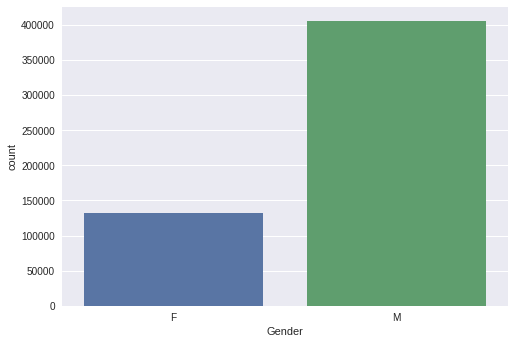

In [68]:
count_m = df[df['Gender']=='M'].count()[0]
count_f = df[df['Gender']=='F'].count()[0]
#Vamos visualizar,atraves de um gráfico, qual o genero que fez mais compras.

sns.countplot(df['Gender'])

print('Quantidade de Homens:',count_m)
print('Quantidade de Mulheres:',count_f)
print('\n')
#Podemos concluir que os Homens gastaram mais dinheiro na Black Friday.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


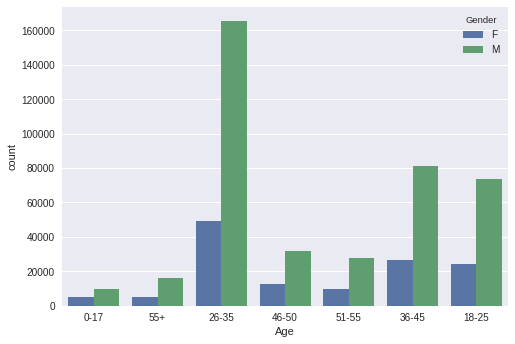

In [69]:
#Diferenças nas idades e em cada genero

sns.countplot(df['Age'],hue=df['Gender'])

#Podemos concluir que, independente da idade, os Homens continuam a gastar mais que as Mulheres.

['F_0' 'M_0' 'M_1' 'F_1']


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


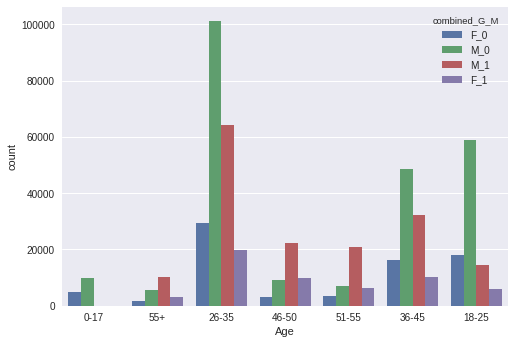

In [70]:
#Para aprofundarmos melhor a cena, vamos criar uma coluna com gender+married para vermos quantos dos Homens são casados.
#F_0 e M_0 representam feminino e masculino que são solteiros; M_1 e F_1 representam feminino e masculino que são casados.

df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

sns.countplot(df['Age'],hue=df['combined_G_M'])

#Podemos concluir que não há barras de casados no intervalo 0-17, como é normal, apartir das idades 46-50 há menos Mulheres, nas idades
#entre 46-55+ os Homens casados gastam mais que os Homens solteiros. Uma possível razão de isto acontecer será devido aos Homens casados
#pagarem as compras às suas Mulheres.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


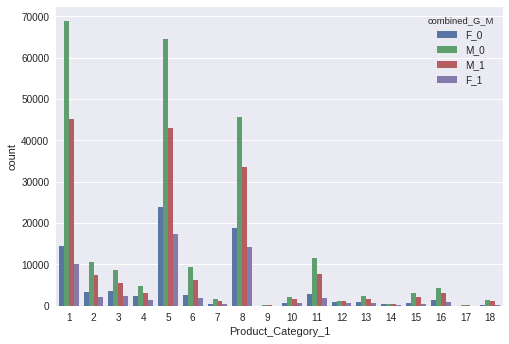

In [71]:
#Apartir dos dados que temos não sabemos se os produtos são produtos mais provaveis de serem comprados por um genero ou outro. 
#Vamos analisar os produtos de categoria 1 para ver se tem alguma inclinação a serem comprados por Homens ou Mulheres.

sns.countplot(df['Product_Category_1'],hue=df['combined_G_M'])

#Analisando o gráfico não há muita diferença entre os dois generos e os gastos estão distribuidos de forma parecida no gráfico anterior.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


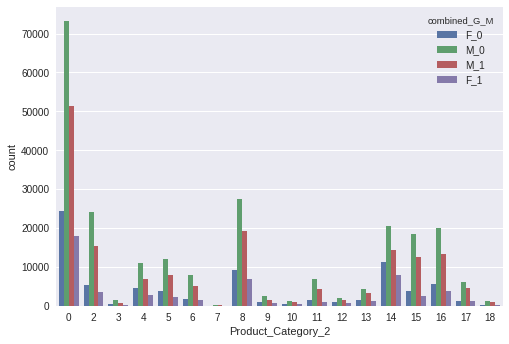

In [72]:
sns.countplot(df['Product_Category_2'],hue=df['combined_G_M'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


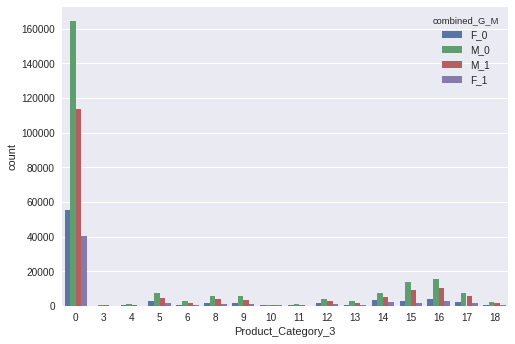

In [73]:
sns.countplot(df['Product_Category_3'],hue=df['combined_G_M'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


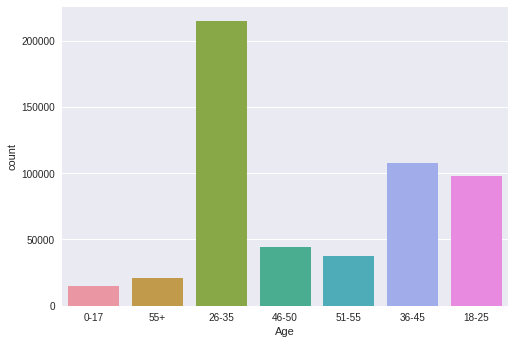

In [74]:
#Vamos visualizar em relação a idades

sns.countplot(df['Age'])

#Podemos concluir que o intervalo de idades que gastou mais dinheiro foi 26-35

##Vamos também analisar outros parâmetros mais à frente...

In [75]:
#Dimensionalidade
display('Dimensionalidade: ' + str(len(df.columns)))
print('\n')

#Esparsidade
display('Esparsidade de cada coluna')
ts = pd.Series(np.random.randn(10))
ts[2:-2] = np.nan
sts = ts.to_sparse()
print(sts)
print('\n')

#Tamanho
display('Tamanho')
df.shape


'Dimensionalidade: 10'

'Esparsidade de cada coluna'

0   -0.755392
1   -1.364711
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8    0.798646
9   -0.502311
dtype: float64
BlockIndex
Block locations: array([0, 8], dtype=int32)
Block lengths: array([2, 2], dtype=int32)




'Tamanho'

(537577, 10)

**Resolução**

- User_ID: int/unique
- Product_ID: int/unique
- Gender: F/M
- Age: idade do cliente em anos 
- Occupation: int, minutos que o cliente esteve na loja
- City_Category: A,B,C. tipo de cidade onde o cliente vive
- Stay_In_Current_City_Years: int, número de anos a viver na cidade
- Marital_Status: 0,1, 0 corresponde a solteiro, 1 corresponde a casado
- Product_Category_1: int, número de categorias do produto
- Product_Category_2: int, "
- Product_Category_3: int, "
- Purchase: int, valor total gasto por cliente
Não temos informação do tipo de moeda, podemos considerar para este trabalho a moeda Euro(€).

Como podemos verificar, cada linha representa uma transação única.

**Features irrelevantes:**

- Product_Id:discreto 

O Product_Id pode ser irrelevante depende do facto se o Product_Category corresponder a um modelo de um produto (xiaomi redmi 4x por exemplo e assim o product_id corresponde ao id de
telemóvel) ou se o product_id corresponde a um produto específico.
- User_ID:discreto

O User_ID pode ser irrelevante porque o nosso objetivo é prever vendas, deste modo um ID de cliente não altera o volume de vendas.

O Occupation pode ser irrelevante porque para o nosso objectivo não precisamos de saber quando tempo o cliente teve na loja à procura do produto desejado.

**Tipo**
- Gender:binário
- Age:contínuo
- Occupation:discreto 
- City_category:discreto 
- Stay_in_Current_City:contnuo 
- Marital Status:Discreto
- Purchase:contínuo 
- Product_Category_1:Discreto
- Product_Category_2:Discreto
- Product_Category_3:Discreto

**NOTA**

As features aqui não presentes são aquilo que consideramos features irrelevantes para o que queremos estudar 

**Análise Nulls**

Pela análise de nulls podemos verificar por exemplo quais os produtos em que os clientes se focam mais uma vez que um null num Product_Category como no nosso exemplo implica que o cliente não comprou aquele produto, assim é possível saber as tendências do mercado e, no caso dos clientes, saber quais os o produtos mais apelativos ao mercado geral. 
Torna também possível à loja criar um stock mais especializado nos produtos mais apelativos o que poderá implicar uma compra ainda maior desses produtos na próxima Black Friday.


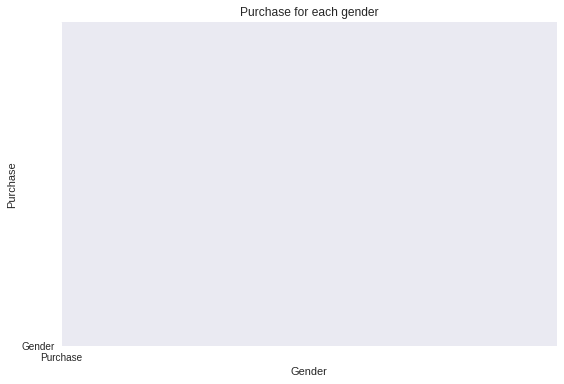

----------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


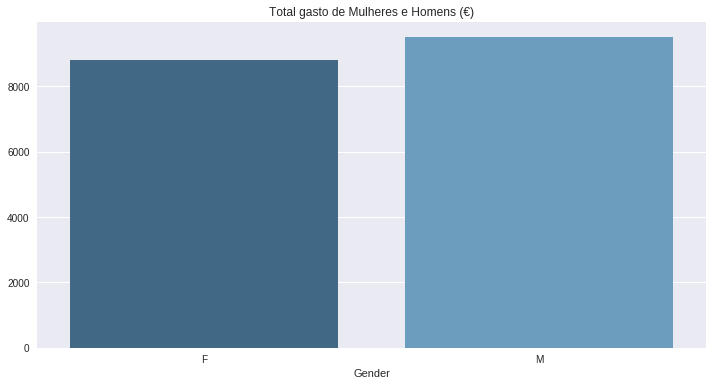



Gasto das compras de Mulheres: 8809.761
Gasto nas compras dos Homens: 9504.772


In [76]:
#Histogramas Código
#df.loc[[0, 1, 2, 3, 4], :] 
#O pedaço de código ao lado deveria em teoria permitir um filtro dos primeiros 5 itens do dataframe 
#impossível testar testei na aula mas aconteceu a mesma coisa ela fica a correr eternamente
#df.hist(bins=500)

plt.bar('Purchase','Gender')
plt.xlim([0,100])
plt.ylim([0,10000])
plt.title("Purchase for each gender")
plt.xlabel("Gender")
plt.ylabel("Purchase")


plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print('----------------------------------------------------------------------------------------------------------------')

spent_byage = df.groupby(by='Gender').mean()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues_d")
plt.title('Total gasto de Mulheres e Homens (€)')
plt.show()

print('\n')
print('Gasto das compras de Mulheres:',round(df[df['Gender']=='F']['Purchase'].sum()/count_f,3))
print('Gasto nas compras dos Homens:',round(df[df['Gender']=='M']['Purchase'].sum()/count_m,3))


In [77]:
#Outliers
indexes = [i for i,j in enumerate(df["Purchase"]) if j>23500]
outlier = df.iloc[indexes, :]
outlier.shape



(1102, 10)

**Outras features que se poderia utilizar** para enriquecer a informação do nosso problema tendo em conta que o objetivo é prever a quantidade de produtos e gastos de um cliente de acordo com os dados fornecidos:
 
 As features disponíveis são:
- User_ID
- Product_ID
- Gender
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status 
- Product_Category_1           
- Product_Category_2             
- Product_Category_3
- Purchase
 

Outras features que podem ser úteis para prever a quantidade de produtos e gastos: 

•	 Income (Salário Auferido vai sempre influenciar a quantidade de dinheiro que alguém pode dispender durante o mês).

•	Transaction_Date (Data das transações, início do mês, meio, final, tem influência na quantidade de dinheiro que as pessoas tem disponível para gastar).

•	Payment Method (Como é feito o pagamento? Cartão, Dinheiro, Crédito.., a partir de que valor monetário é requisitado o crédito?, qual o salário médio das pessoas que pedem créditos?).

•	Sales  (Existência de promoções em vigor).

•	Sales Date and Period (Caso existam promoções, em que data são feitas e durante quanto tempo as promoções ficam em vigor).


** Encoding ou one hot encoding para cada feature discreta**
- User_ID (Não usada)
- Product_ID (Não usada)
- Gender (Sim, uma vez que ser sexo Masculino ou Feminino não tem ligação um com o outro).
- Occupation (Sim, uma vez que as o tempo passado na loja nao tem ligação entre os clientes).
- City_Category (Sim, mesmo motivo de cima, categorias não têm relação umas com as outras).
- Stay_In_Current_City_Years (Não uma vez que à medida que o valor aumenta, significa que o número de anos permanecidos na cidade também aumentou.
- Marital_Status (Sim, porque ser Casado, Solteiro ou Divorciado não tem relação uns com os outros).
- Product_Category_1    (Sim, uma vez as categorias dos produtos não estão relacionadas).      
- Product_Category_2    (Sim, uma vez as categorias dos produtos não estão relacionadas).         
- Product_Category_3 (Sim, uma vez as categorias dos produtos não estão relacionadas).
- Purchase (Não, uma vez que são valores numéricos muito dispares referentes a montantes, logo não faz sentido usar um método de classificação binário para os classificar.


In [78]:
#Matriz de correlação entre as features usando df.corr();
df.corr()




,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Marital_Status,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,-0.004363,-0.389048,0.090284,1.000000,0.284120
Purchase,0.000129,-0.314125,0.038395,0.284120,1.000000


In [79]:
#Estatisticas da label/target
display(df.describe())
print('\n Purchase')
df['Purchase'].agg(['min','max','mean'])

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,0.408797,5.295546,6.784907,3.871773,9333.859853
std,0.491612,3.750701,6.211618,6.265963,4981.022133
min,0.000000,1.000000,0.000000,0.000000,185.000000
25%,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.000000,18.000000,18.000000,18.000000,23961.000000



 Purchase


min       185.000000
max     23961.000000
mean     9333.859853
Name: Purchase, dtype: float64

**Analise em termos estatísticos a Label/target que tem para já como problema:**

Como a nossa label/target é Purchase, podemos concluir que o gasto médio é 9333 €, acaba por ser o lucro médio na Black Friday para a loja. A compra de valor mais baixo foi 185 € e o mais alto foi 23961 €. O total de dinheiro gasto foi 537577 €, lucro da loja. 

# Analisando a nossa label/target

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


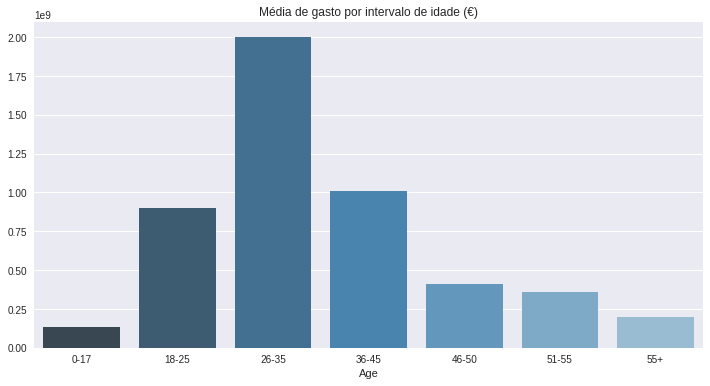

In [80]:
gastoPorIdade = df.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=gastoPorIdade.index,y=gastoPorIdade.values, palette="Blues_d")
plt.title('Média de gasto por intervalo de idade (€)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


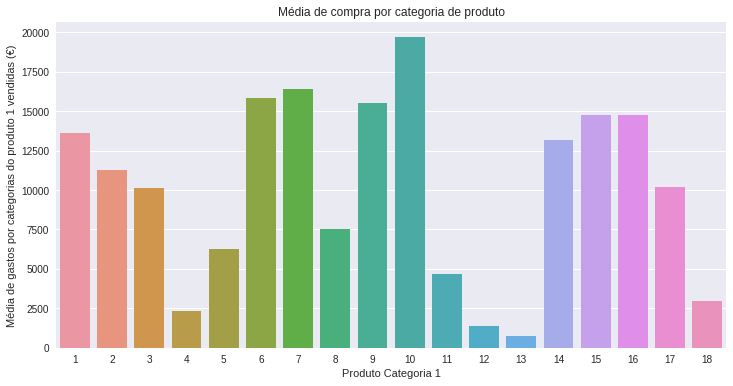

In [82]:
categoria = []
mediaGasto = []


for i in df['Product_Category_1'].unique():
    categoria.append(i)
categoria.sort()

for e in categoria:
    mediaGasto.append(df[df['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=categoria,y=mediaGasto)
plt.title('Média de compra por categoria de produto')
plt.xlabel('Produto Categoria 1')
plt.ylabel('Média de gastos por categorias do produto 1 vendidas (€)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


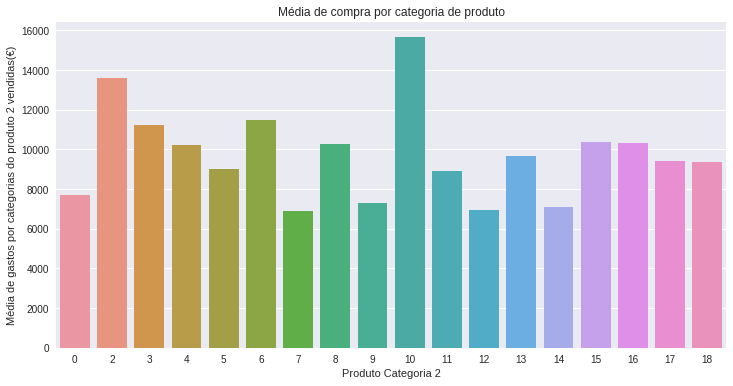

In [83]:
categoria = []
mediaGasto = []


for i in df['Product_Category_2'].unique():
    categoria.append(i)
categoria.sort()

for e in categoria:
    mediaGasto.append(df[df['Product_Category_2']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=categoria,y=mediaGasto)
plt.title('Média de compra por categoria de produto')
plt.xlabel('Produto Categoria 2')
plt.ylabel('Média de gastos por categorias do produto 2 vendidas(€)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


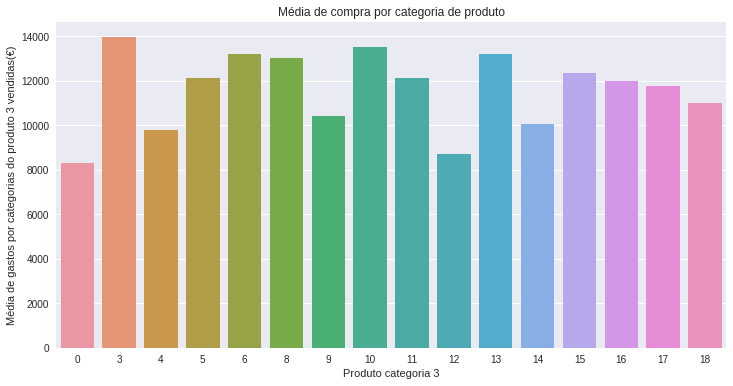

In [84]:
categoria = []
mediaGasto = []


for i in df['Product_Category_3'].unique():
    categoria.append(i)
categoria.sort()

for e in categoria:
    mediaGasto.append(df[df['Product_Category_3']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=categoria,y=mediaGasto)
plt.title('Média de compra por categoria de produto')
plt.xlabel('Produto categoria 3')
plt.ylabel('Média de gastos por categorias do produto 3 vendidas(€)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


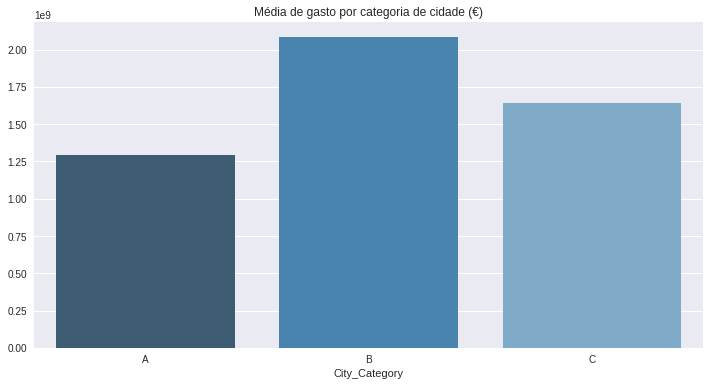

In [85]:
gastoPorCidade = df.groupby(by='City_Category').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=gastoPorCidade.index,y=gastoPorCidade.values, palette="Blues_d")
plt.title('Média de gasto por categoria de cidade (€)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


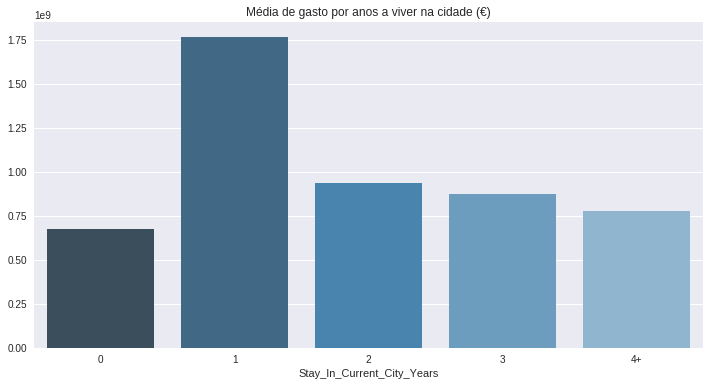

In [86]:
gastoPorAnosCidade = df.groupby(by='Stay_In_Current_City_Years').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=gastoPorAnosCidade.index,y=gastoPorAnosCidade.values, palette="Blues_d")
plt.title('Média de gasto por anos a viver na cidade (€)')
plt.show()

### Análise dos gráficos

Olhando para o gráfico da contagem de homens e mulheres que aderiram ao black friday conclui-se que houve mais homens que mulheres mas, analisando o gasto total de cada género verifica-se que, apesar de haver mais homens em loja que mulheres, os gastos entre os dois géneros não foram muito diferentes (9504.772-8809.761=695,011, diferença dos gastos de cada género). 
No gráfico do gasto por intervalo de idade os clientes entre 26-35 anos gastaram mais na loja.
Se comprararmos as idades dos clientes com o género a mesma situação acontece, os homens gastam mais que as mulheres e acontece mais no intervalo de idades 26-35.
Podemos verificar, no gráfico que compara gastos entre idades e situação matrimonial, que entre as idades 0-17 e casados não há barras o que é normal. Se olharmos acima da idade 46 há muito menos mulheres. Os homens casados entre 46-55 anos gastaram mais que mulheres casadas. Isto pode implicar que, apesar de as mulheres gostarem muito de fazer compras é possível que sejam os maridos a pagar por elas, por esta razão os dados mostram que há mais contagem de homens na loja e há mais gasto por parte dos homens, casados e solteiros.
Nas categorias de produtos também não temos informação que tipo de produto se trata, poderíamos ter, por exemplo, categoria de produto de higiene feminina, assim comparavamos os gastos de cada género em relação a este produto e concluir se as mulheres foram à loja comprar este produto ou se pediram aos maridos para irem à loja comprar para elas.
Em relação das categorias de produtos, segundo os 3 gráficos para as 3 categorias, a categoria de produto 1 é a menos comprada e a categoria de produto 3 é a mais comprada. 
Na categoria de produto 1, os homens casados e solteiros gastaram mais, não houve muita adesão por parte das mulheres. 
Na categoria de produto 2, mas não houve muita diferença de gastos, continuando os homens (casados e solteiros) a gastar mais.
Na categoria de produto 3 foi o tipo de produto mais vendido na black friday mas os clientes compraram mais a categoria 0 (independentemente da situação matrimonial).
No gráfico da categoria de cidade onde os clientes vivem houve mais adesão para quem mora na categoria de cidade B, seguido da cidade C e A, respectivamente. Os clientes que moram na zona B foram os que gastaram mais na loja. Isto pode indicar que a loja esteja posicionada no centro da cidade, sendo a zona B uma zona de subúrbios e onde mais população mora devido ao preços altos de imobiliária nos centros da cidade.
No gráfico onde indica os anos que os clientes moram na cidade mostra que quem mora na cidade à 1 ano adreriram mais às promoções de black friday. Os clientes que moram à 2, 3, 4+ e 0 gastaram menos, respectivamente. Como os clientes que moram à um ano na cidade tiveram tempo de explorar e conhecer todos os 'cantos da casa', assim chega a black friday e já sabem tudo o que vai acontecer nas lojas da cidade. Os clientes que moram à 0 anos na cidade (menos de 1 ano) ainda não tiveram o tempo e disponibilidade de conhecer todos os espaços da cidade, daí a menor adesão às promoções desse dia. Apartir dos 2 anos as pessoas já se estabeleceram na cidade e já tem a vida mais organizada, não tem tanto a necessidade de gastar dinheiro no black friday. Se aderiram a este dia é porque viram alguma promoção de algum produto que ainda não tem ou para substituir por algum que já tem à muito tempo.